## Outcomes and Random Variables

In [50]:
import pandas as pd
import numpy as np

In [51]:
die = pd.DataFrame([1,2,3,4,5,6])

In [52]:
sum_of_dice = die.sample(2,replace=True).sum().loc[0] # value will keep changing each time you run this cell
print('Sum of dice is',sum_of_dice)

Sum of dice is 9


In [53]:
trial = 10000
result = [die.sample(2,replace=True).sum().loc[0] for i in range(trial)]
result[:10]

[10, 2, 7, 6, 3, 9, 6, 8, 5, 9]

## Frequency and Distributions

In [54]:
freq = pd.DataFrame(result)[0].value_counts() #created a df having index and columns from result 
sort_freq = freq.sort_index()
len(sort_freq)

11

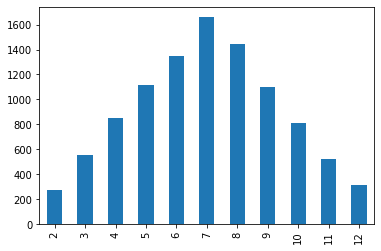

In [55]:
rel_freq = sort_freq/trial
rel_freq.plot(kind ='bar')
sort_freq.plot(kind ='bar')

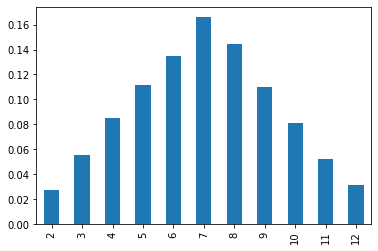

In [56]:
rel_freq.plot(kind ='bar')

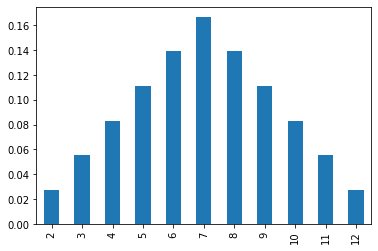

In [57]:
x_distri = pd.DataFrame(index = [2,3,4,5,6,7,8,9,10,11,12])
x_distri['prob'] = [1,2,3,4,5,6,5,4,3,2,1]      # probability of each outcome in the die toss
x_distri['prob'] = x_distri['prob']/36          # probabilty of one dice having any number come up is 1/6
x_distri['prob'].plot(kind ='bar')

In [58]:
mean = (x_distri.index*x_distri['prob']).sum()
mean

6.999999999999998

In [59]:
variance = (((x_distri.index-mean)**2)*x_distri['prob']).sum() # var is summation of (x-mean)^2 *p(x)
variance 

5.833333333333333

In [49]:
sd = variance**1/2          # std deviation
sd

2.9166666666666665

#### Logging Daily Return of Facebook Stock. Download the .csv from [here](https://www.kaggle.com/aayushmishra1512/facebook-complete-stock-data2012-2020latest)

In [62]:
fb = pd.read_csv(r'../Week2/fb.csv')
fb

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2071,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
2072,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000
2073,2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700
2074,2020-08-17,262.500000,264.100006,259.399994,261.160004,261.160004,13351100


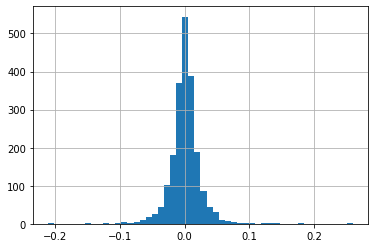

In [65]:
fb['return'] = np.log(fb['Close']).shift(-1)-np.log(fb['Close'])
fb['return'].hist(bins= 50)


In [67]:
from scipy.stats import norm

In [99]:
density = pd.DataFrame()
density['x'] = np.arange(-4,4,0.001)
density['x'].head

<bound method NDFrame.head of 0      -4.000
1      -3.999
2      -3.998
3      -3.997
4      -3.996
        ...  
7995    3.995
7996    3.996
7997    3.997
7998    3.998
7999    3.999
Name: x, Length: 8000, dtype: float64>

In [105]:
density['pdf'] = norm.pdf(density['x'],0,1)
density['cdf'] = norm.cdf(density['x'],0,1)  
density['pdf']
density['cdf']

0       0.000032
1       0.000032
2       0.000032
3       0.000032
4       0.000032
          ...   
7995    0.999968
7996    0.999968
7997    0.999968
7998    0.999968
7999    0.999968
Name: cdf, Length: 8000, dtype: float64

In [89]:
mu = fb['return'].mean()
sigma = fb['return'].std(ddof=1)
print(mu,sigma)

0.0009282027997259224 0.023346501971697856


#### There is a very nice video for understanding what is PDF and CDF [here](https://youtu.be/YXLVjCKVP7U)

In [101]:
import matplotlib.pyplot as plt

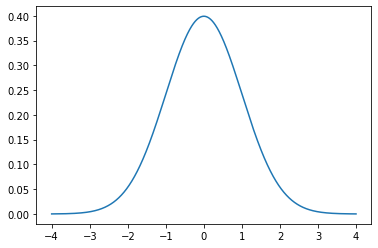

In [109]:
density['pdf']
plt.plot(density['x'],density['pdf'])

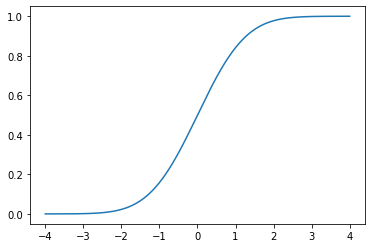

In [110]:
plt.plot(density['x'],density['cdf'])

In [112]:
help(np.log)

Help on ufunc object:

log = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array o